***Importing Libraries***

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***1.Pandas is used for data manipulation and analysis.<br>2.Numpy is used for numerical Operations.<br>3.Matplotlib.pylot and seaborn are used for data visualization.***

***Create the dataframe***

In [11]:
dataframe = pd.read_csv("Zomato data.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [18]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


***Data Cleaning***

***Convert the datatype of column Rate to float and remove denominator***

In [21]:
#Convert the datatype of column Rate
def handleRate(value):
  value = str(value).split("/")
  value = value[0]
  return float(value)

dataframe["rate"] = dataframe["rate"].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


***Summary of the dataframe Conculsion there is no Nul value in dataframe.***

***Q1. What type of restaurant do the majority of customers order from?***

In [25]:
#Type of Restaurant
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


***Solutions:***

<ipython-input-33-05e254a78ed4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette="viridis")


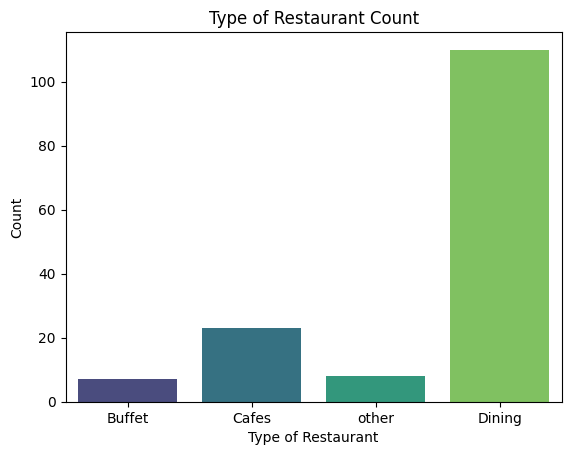

In [33]:
sns.countplot(x=dataframe['listed_in(type)'], palette="viridis")
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.title("Type of Restaurant Count")
plt.show()

***Conclusion:The majority of the restaurans fall into dining Category. Dining Restaurants are preferred by a larger number of individuals.***

***Q2.How many votes has each type of restaurant received from customers?***

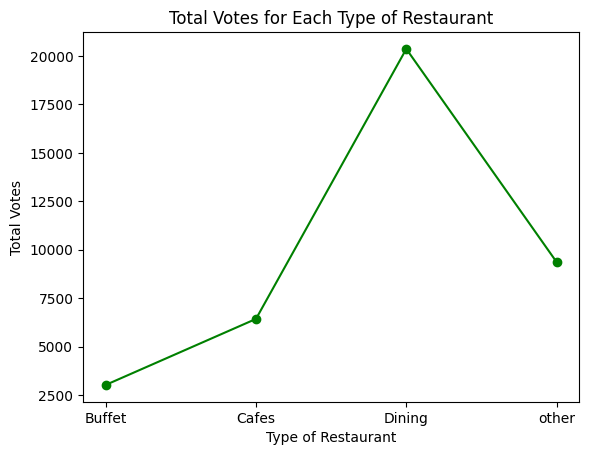

In [34]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.title("Total Votes for Each Type of Restaurant")
plt.show()

***Conclusion: Dining Restaurant has Maxing Votes.***

***Q3. What are the ratings that the majority of restaurants have received?***

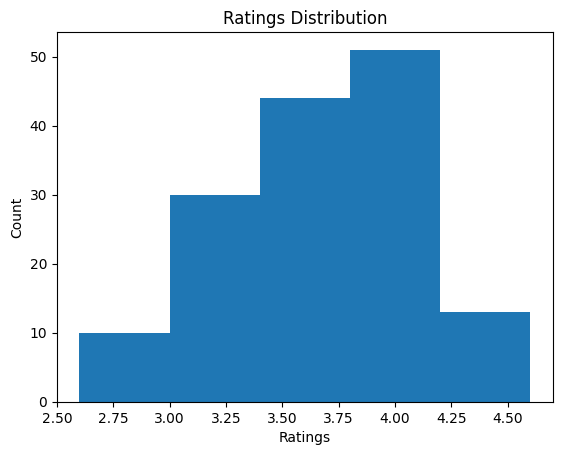

In [35]:
plt.hist(dataframe["rate"],bins=5)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()

***Conclusion:The majority of restaurants received ratings ranging from 3.5 to 4.The Majority of couples prefer restaurants with approximate cost of 300 rupees.***

***Q4. Zomato has observed that most couples order most of their food online.What is the averrage spending on each order?***

<ipython-input-39-3d1a711b087c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette="viridis")


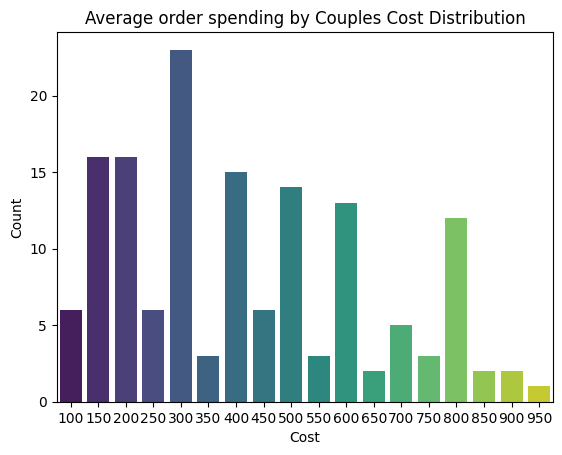

In [39]:
#Average order spending by couples
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette="viridis")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.title("Average order spending by Couples Cost Distribution")
plt.show()

***Conclusion: The majority of couples prefer resturants with an approximate cost of 300 rupees***

***Q5.Which mode (online or offline) has received the maximum rating?***

<ipython-input-43-6d3b730d79dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframe['online_order'], y=dataframe['rate'], palette="viridis")


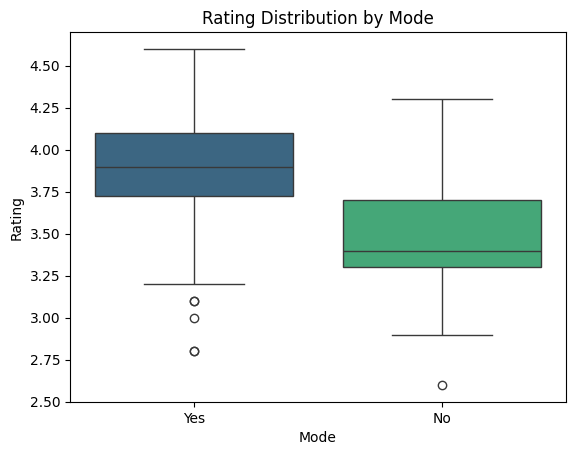

In [43]:
plt.figure()
sns.boxplot(x=dataframe['online_order'], y=dataframe['rate'], palette="viridis")
plt.xlabel("Mode")
plt.ylabel("Rating")
plt.title("Rating Distribution by Mode")
plt.show()

***Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.***

***Q6.Which type of restaurant received more offline orders.so that Zomato can provide customer with some good offers?***

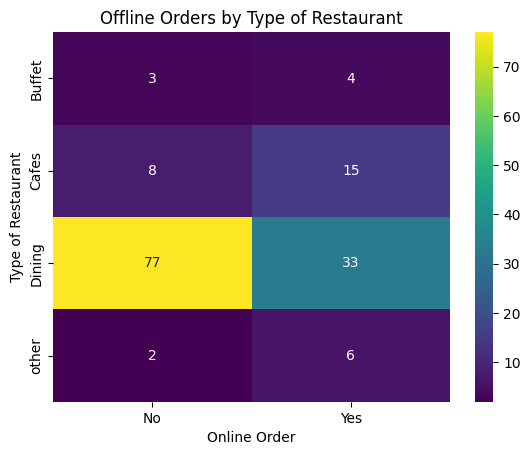

In [46]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="viridis", fmt='d')
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.title("Offline Orders by Type of Restaurant")
plt.show()

***Conclusion:Dining restaurants primarily accept offline orders,whereas cafes primarily receive online orders.This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.***